In [1]:
import os
import pandas as pd
import numpy as np

import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read results

In [3]:

logs_dir = './logs/modeldata'
all_files = os.listdir(logs_dir)

csv_files = [file for file in all_files ]

print(csv_files)
csv_files=csv_files[4:5]
#csv_files=[csv_files[0],csv_files[-1]]
print(csv_files)


['_March21_10_50_01_.csv', '_April06_13_56_06_.csv', '_April04_17_16_55_.csv', '_March29_18_58_37_.csv', '_April09_13_39_46_.csv']
['_April09_13_39_46_.csv']


# Box plot

In [8]:
dataframes = []
for file in csv_files:
    file_path = os.path.join(logs_dir, file)
    print(file_path)
    df = pd.read_csv(file_path)
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)
print(df)

./logs/modeldata/_April09_13_39_46_.csv
     test accuracy    recall  precision  trainingset_size             type  \
0        75.496117  0.309057   0.747178               500  active learning   
1        81.794651  0.584500   0.769042              1000  active learning   
2        83.951682  0.551821   0.883408              1500  active learning   
3        84.843256  0.637722   0.830900              2000  active learning   
4        83.520276  0.647059   0.780405              2500  active learning   
..             ...       ...        ...               ...              ...   
125      85.591027  0.618114   0.877984              3000  active learning   
126      84.728214  0.735761   0.760618              3500  active learning   
127      85.734829  0.690943   0.817680              4000  active learning   
128      86.453840  0.653595   0.875000              4500  active learning   
129      87.057808  0.651727   0.900645              5000  active learning   

          method  seed 

# Influence model architecture

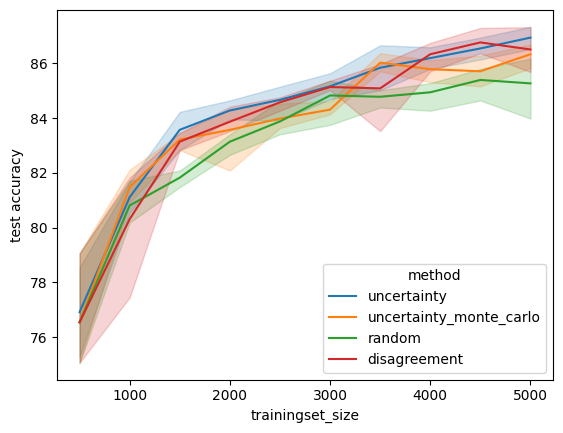

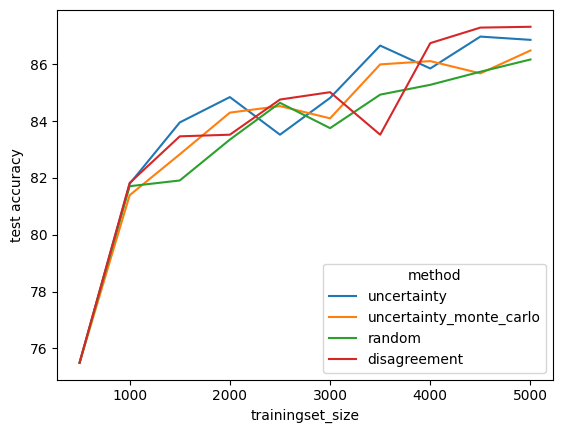

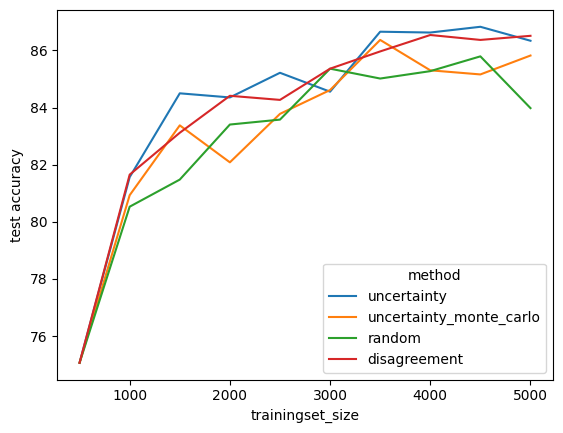

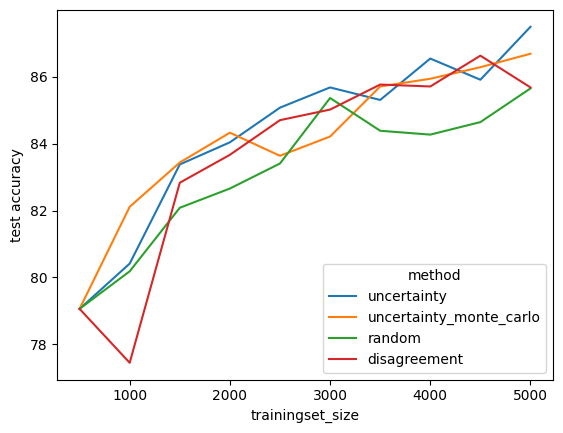

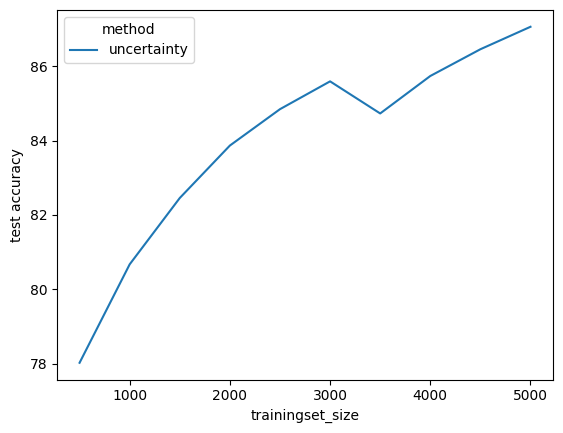

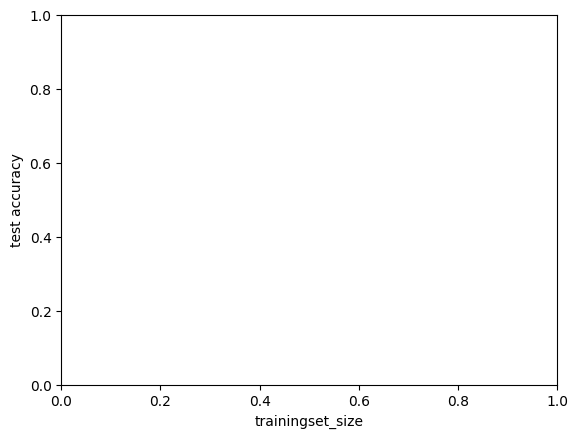

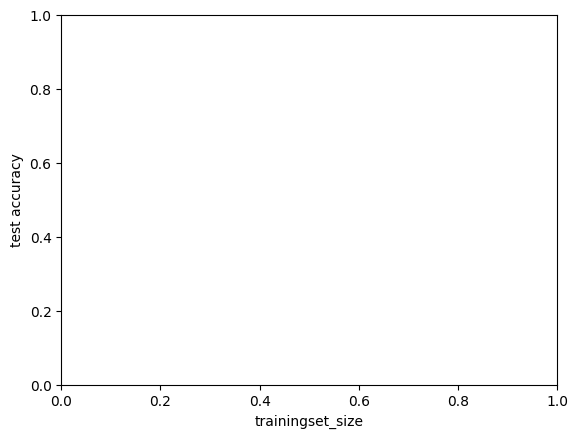

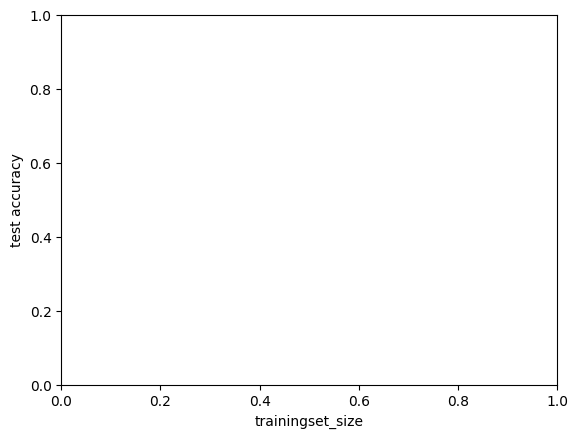

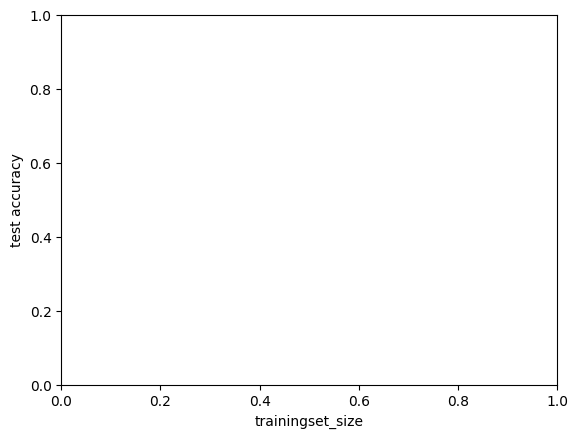

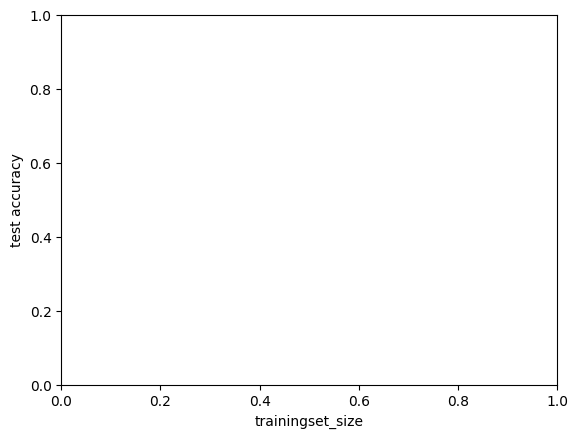

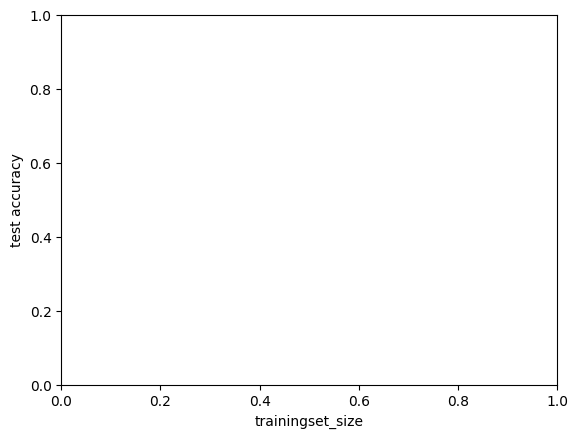

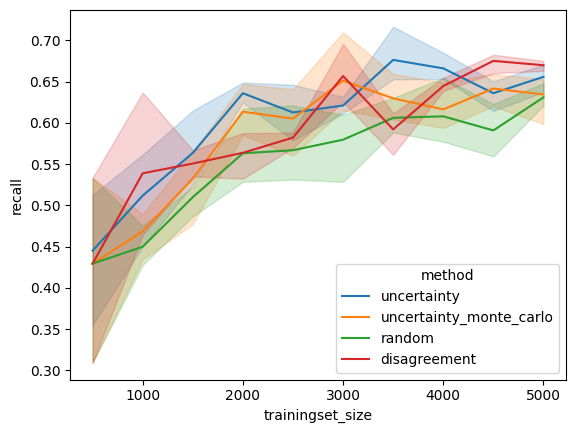

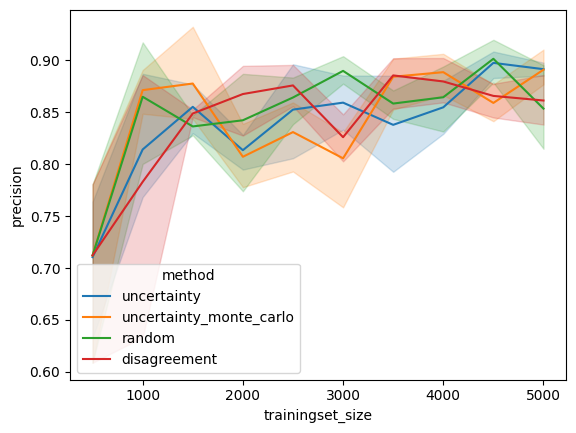

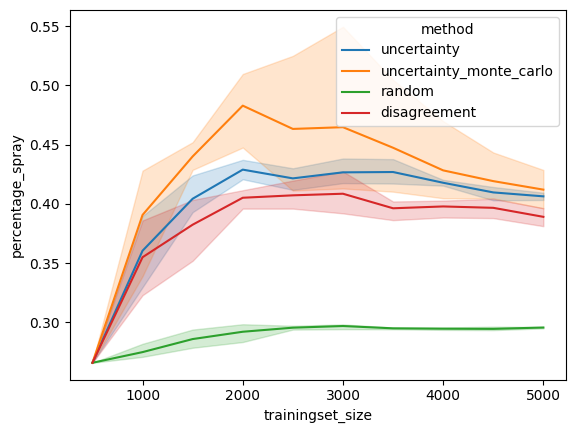

In [9]:
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']
#df = pd.concat([df[df['method'] == 'random'], df[df['type'] == 'active learning_no_weight']])
#df=df[df['method'] == 'random']
#df=df[df['type'] == 'active learning_no_weight']

sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
plt.show()
for i in range(10):

    sns.lineplot(data=df[df['seed'] == i], x="trainingset_size", y="test accuracy", hue="method")
    plt.show()

#sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
#sns.lineplot(data=sns.lineplot(data=df[''], x="trainingset_size", y="test accuracy", hue="method")

plt.show()
sns.lineplot(data=df, x="trainingset_size", y="recall", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="precision", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="percentage_spray", hue="method")
plt.show()

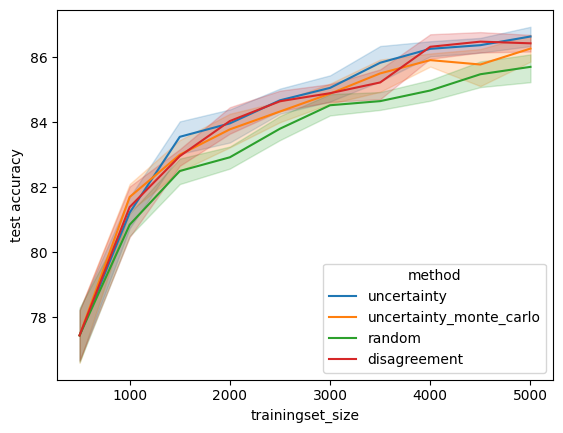

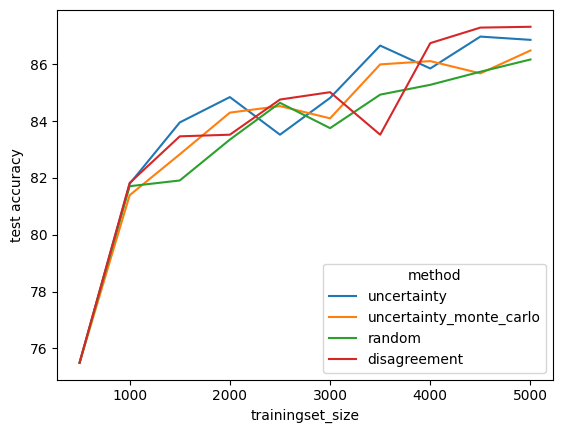

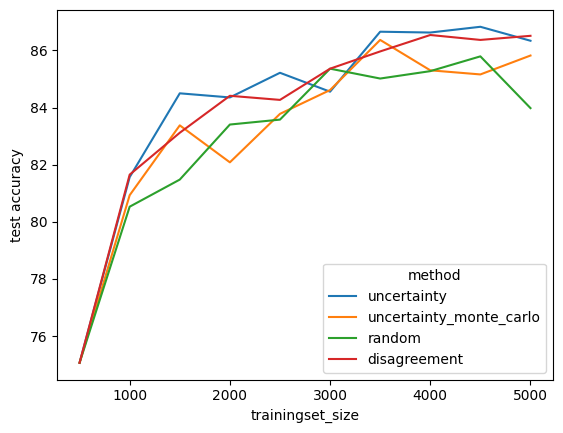

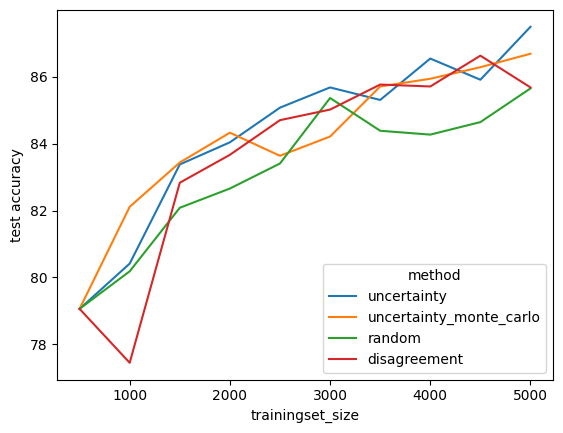

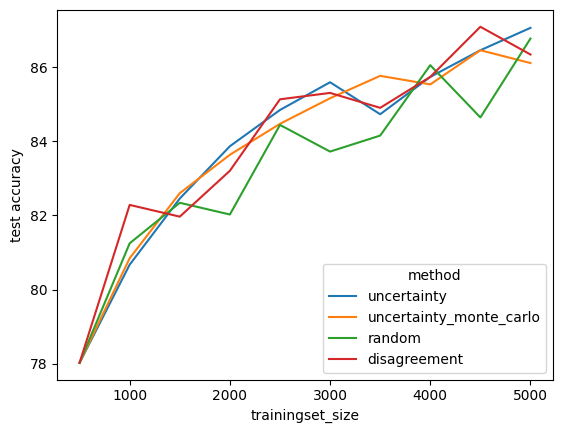

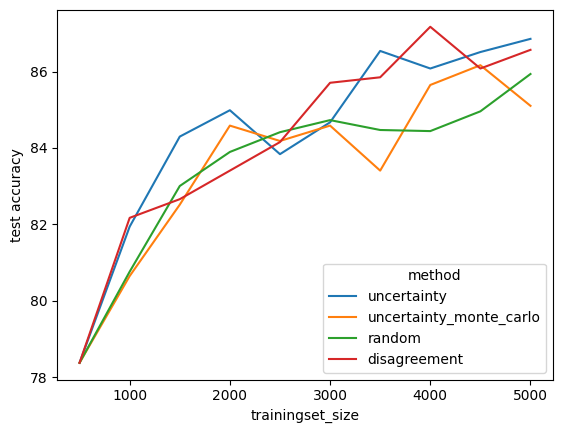

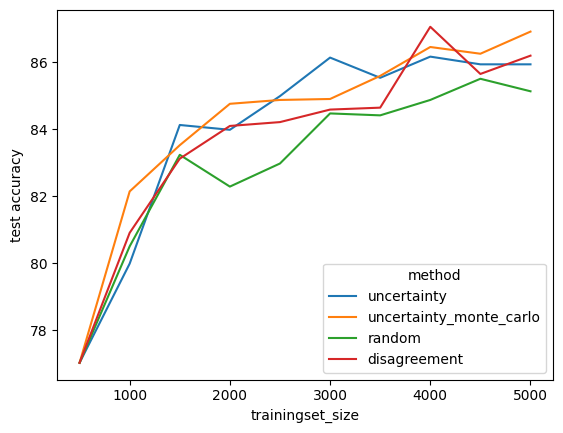

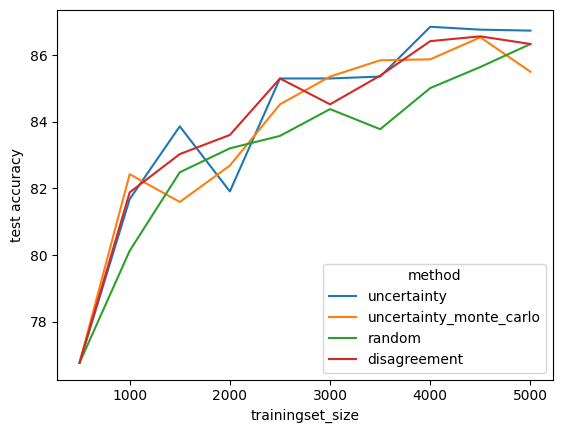

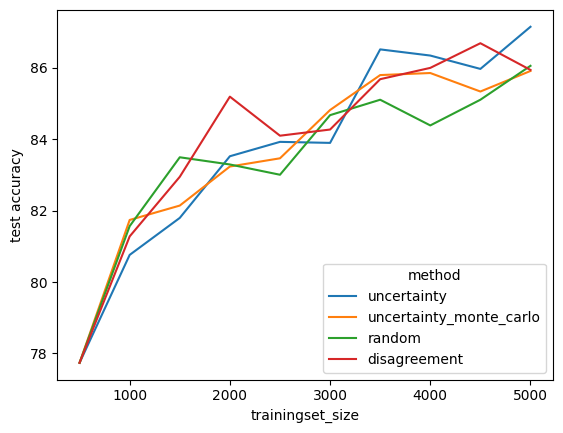

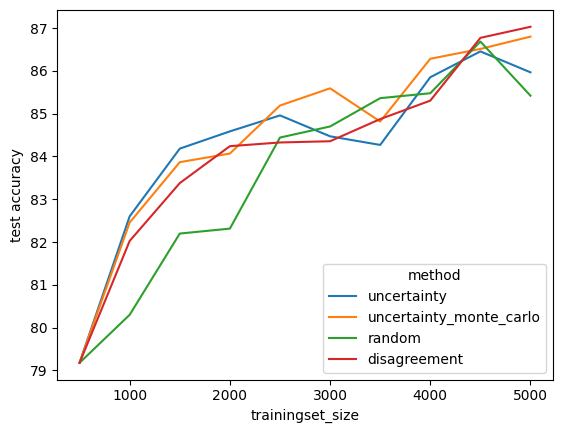

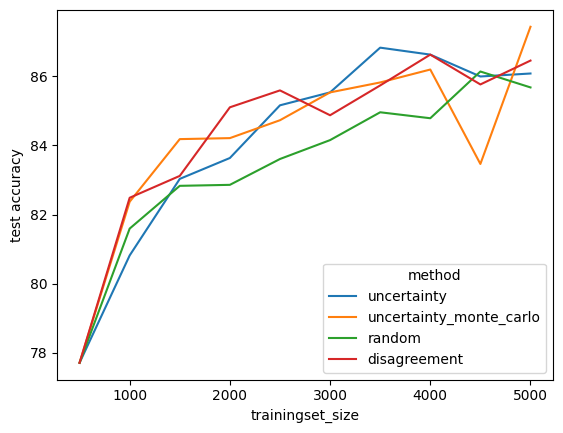

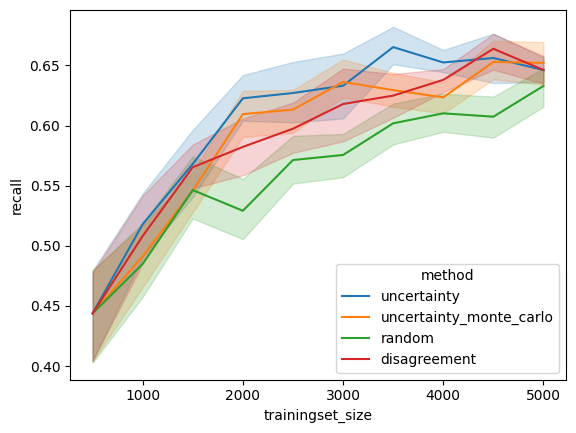

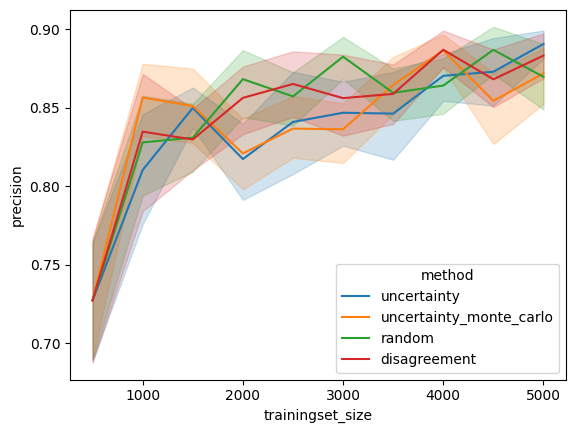

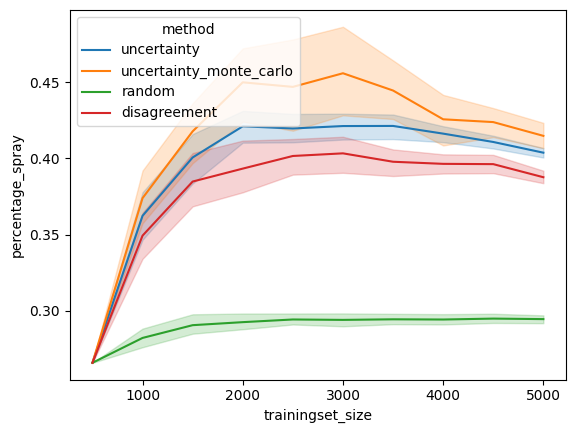

In [ ]:
columns = [ 'test accuracy','recall','precision', 'trainingset_size', 'type', 'method','seed','percentage_spray']
#df = pd.concat([df[df['method'] == 'random'], df[df['type'] == 'active learning_no_weight']])
#df=df[df['method'] == 'random']
#df=df[df['type'] == 'active learning_no_weight']

sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
plt.show()
for i in range(10):

    sns.lineplot(data=df[df['seed'] == i], x="trainingset_size", y="test accuracy", hue="method")
    plt.show()

#sns.lineplot(data=df, x="trainingset_size", y="test accuracy", hue="method")
#sns.lineplot(data=sns.lineplot(data=df[''], x="trainingset_size", y="test accuracy", hue="method")

plt.show()
sns.lineplot(data=df, x="trainingset_size", y="recall", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="precision", hue="method")
plt.show()
sns.lineplot(data=df, x="trainingset_size", y="percentage_spray", hue="method")
plt.show()

# Influence preprocessing

## Masking vs pixel remapping

## Crop remap interpolation

Procedure:

* Crop rectangle in frame
* Remap pixels in trapezoid to square

Check influence of interpolation type during remap on the accuracy

# Influence input resolution